# [ERG-190C] Homework 2: Pandas EPA Air Quality

---

## Table of Contents
[Introduction](#intro)<br>
1 - [Downloading the Data](#data)<br>
2 - [Preparing the Data](#prep)<br>
3 - [Exploring Data with Pandas](#explore)<br>
4 - [California Data](#cadata)<br>

# Introduction <a id='intro'></a>

In this homework, we will investigate air quality data retreived from the EPA. The main goal for this assignment is to understand how PM2.5 FRM/FEM Mass effects air quality. We will accomplish this by analyzing EPA data and utilizing pandas (a powerful Python data analysis toolkit). To give us a sense of how we think about each discovery we make and what next steps it leads to we will provide comments and insights along the way.

### Topics Covered

As we clean and explore these data, you will gain practice with:
* Manipulating tables and parts of the table (column, index)
* Identifying the type of data collected, missing values, anomalies, etc.
* Computing numeric operations (mean, variance)
* Merging and analyzing data sets

----

## Section 1: Downloading the Data<a id='data'></a>

In [189]:
#Run this cell
from pathlib import Path
import sys
import math
import zipfile
%matplotlib inline
import matplotlib.pyplot as plt

In [190]:
import pandas as pd
import numpy as np

In [191]:
aqi = pd.read_csv('./data/annual_aqi_by_county_2018.csv')
incomes = pd.read_csv('./data/ACS_16_5YR_S1901_with_ann.csv')

In [192]:
income_columns = incomes.iloc[0]
income_columns

GEO.id                                                              Id
GEO.id2                                                            Id2
GEO.display-label                                            Geography
HC01_EST_VC01                              Households; Estimate; Total
HC01_MOE_VC01                       Households; Margin of Error; Total
HC02_EST_VC01                                Families; Estimate; Total
HC02_MOE_VC01                         Families; Margin of Error; Total
HC03_EST_VC01                 Married-couple families; Estimate; Total
HC03_MOE_VC01          Married-couple families; Margin of Error; Total
HC04_EST_VC01                    Nonfamily households; Estimate; Total
HC04_MOE_VC01             Nonfamily households; Margin of Error; Total
HC01_EST_VC02                  Households; Estimate; Less than $10,000
HC01_MOE_VC02           Households; Margin of Error; Less than $10,000
HC02_EST_VC02                    Families; Estimate; Less than $10,000
HC02_M

In [193]:
incomes = incomes.iloc[1:].reset_index()
incomes.head()

,index,GEO.id,GEO.id2,GEO.display-label,HC01_EST_VC01,HC01_MOE_VC01,HC02_EST_VC01,HC02_MOE_VC01,HC03_EST_VC01,HC03_MOE_VC01,...,HC04_EST_VC19,HC04_MOE_VC19,HC01_EST_VC20,HC01_MOE_VC20,HC02_EST_VC20,HC02_MOE_VC20,HC03_EST_VC20,HC03_MOE_VC20,HC04_EST_VC20,HC04_MOE_VC20
0,1,0500000US01001,1001,"Autauga County, Alabama",20800,391,14653,527,11735,505,...,(X),(X),(X),(X),(X),(X),(X),(X),29.5,(X)
1,2,0500000US01003,1003,"Baldwin County, Alabama",75149,1285,50190,1356,40093,1163,...,(X),(X),(X),(X),(X),(X),(X),(X),28.2,(X)
2,3,0500000US01005,1005,"Barbour County, Alabama",9122,286,5968,260,3968,223,...,(X),(X),(X),(X),(X),(X),(X),(X),26.9,(X)
3,4,0500000US01007,1007,"Bibb County, Alabama",7048,352,5272,329,3928,360,...,(X),(X),(X),(X),(X),(X),(X),(X),38.8,(X)
4,5,0500000US01009,1009,"Blount County, Alabama",20619,403,15439,475,12314,480,...,(X),(X),(X),(X),(X),(X),(X),(X),26.8,(X)


In [194]:
first = incomes['GEO.display-label'][0]

In [195]:
first

'Autauga County, Alabama'

In [196]:
lst = first.split(sep=' County, ')
lst

['Autauga', 'Alabama']

In [197]:
county = lst[0]
county

'Autauga'

In [198]:
state = lst[1]
state

'Alabama'

In [199]:
income_ids = incomes['GEO.display-label'].apply(lambda x: x.split(sep=' County, '))
incomes['county_id'] = income_ids.astype(str)
income_ids.head()

0    [Autauga, Alabama]
1    [Baldwin, Alabama]
2    [Barbour, Alabama]
3       [Bibb, Alabama]
4     [Blount, Alabama]
Name: GEO.display-label, dtype: object

In [200]:
aqi_ids = aqi.apply(lambda x: [x['County'], x['State']], axis=1)
aqi['county_id'] = aqi_ids.astype(str)
aqi_ids.head()

0       [DeKalb, Alabama]
1       [Etowah, Alabama]
2    [Jefferson, Alabama]
3       [Mobile, Alabama]
4       [Morgan, Alabama]
dtype: object

In [201]:
merged = incomes.merge(aqi, on='county_id')

In [202]:
merged.head()

,index,GEO.id,GEO.id2,GEO.display-label,HC01_EST_VC01,HC01_MOE_VC01,HC02_EST_VC01,HC02_MOE_VC01,HC03_EST_VC01,HC03_MOE_VC01,...,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10
0,25,0500000US01049,1049,"DeKalb County, Alabama",24811,497,17495,651,13443,637,...,0,44,37,31,0,0,58,0,0,0
1,28,0500000US01055,1055,"Etowah County, Alabama",39522,505,27098,666,19676,701,...,0,153,62,52,0,0,0,0,59,0
2,37,0500000US01073,1073,"Jefferson County, Alabama",261773,1411,165637,1668,107619,1530,...,0,72,57,47,0,1,6,7,44,1
3,49,0500000US01097,1097,"Mobile County, Alabama",154261,1149,102867,1451,68560,1368,...,0,53,38,17,0,0,0,20,39,0
4,52,0500000US01103,1103,"Morgan County, Alabama",46164,567,31712,854,23474,724,...,0,56,50,29,0,0,0,0,59,0


In [203]:
income_columns.loc['HC02_EST_VC04':'HC02_EST_VC15']

HC02_EST_VC04               Families; Estimate; $15,000 to $24,999
HC02_MOE_VC04        Families; Margin of Error; $15,000 to $24,999
HC03_EST_VC04    Married-couple families; Estimate; $15,000 to ...
HC03_MOE_VC04    Married-couple families; Margin of Error; $15,...
HC04_EST_VC04    Nonfamily households; Estimate; $15,000 to $24...
HC04_MOE_VC04    Nonfamily households; Margin of Error; $15,000...
HC01_EST_VC05             Households; Estimate; $25,000 to $34,999
HC01_MOE_VC05      Households; Margin of Error; $25,000 to $34,999
HC02_EST_VC05               Families; Estimate; $25,000 to $34,999
HC02_MOE_VC05        Families; Margin of Error; $25,000 to $34,999
HC03_EST_VC05    Married-couple families; Estimate; $25,000 to ...
HC03_MOE_VC05    Married-couple families; Margin of Error; $25,...
HC04_EST_VC05    Nonfamily households; Estimate; $25,000 to $34...
HC04_MOE_VC05    Nonfamily households; Margin of Error; $25,000...
HC01_EST_VC06             Households; Estimate; $35,000 to $49

In [204]:
median_incomes = merged['HC02_EST_VC13'].astype(int)


In [205]:
median_aqi = merged['Median AQI'].astype(int)
percentile_aqi = merged['90th Percentile AQI'].astype(int)
pm_aqi = merged['Days PM2.5'].astype(int)

(0, 100)

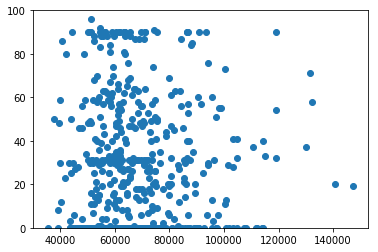

In [206]:
plt.scatter(median_incomes, pm_aqi)
plt.ylim(0, 100) 

In [207]:
family_counts = merged['HC02_EST_VC01']

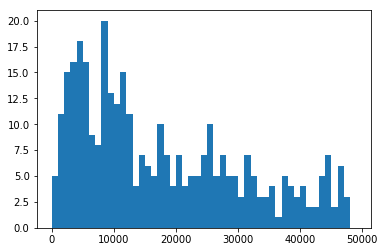

In [208]:
plt.hist(family_counts.sample(500).astype(int).values, bins=range(0, 50000, 1000));

In [212]:
cutoff = 30000
urban = merged[merged['HC01_EST_VC01'].astype(int) > cutoff]

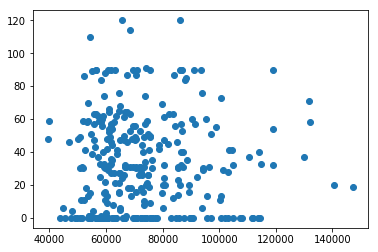

In [213]:
median_incomes = urban['HC02_EST_VC13'].astype(int)
median_aqi = urban['Median AQI'].astype(int)
pm_aqi = urban['Days PM2.5'].astype(int)
plt.scatter(median_incomes, pm_aqi)